In [1]:
import cogent3
from cogent3 import get_app
import matplotlib.pyplot as plt
import paths
import libs

# CDS sample alignment

I sampled chromosome 22 cds using 
```
eti homologs -i install/ --outdir cds --ref human --coord_names 22 
```
Then I trim stop codons and use a codon alignment model for all the sequences using
```
trim_stops = get_app("trim_stop_codons")
codon_align = get_app("progressive_align", "codon", guide_tree="(Human:0.06,Chimpanzee:0.06,Gorilla:0.1)")
```
I store the aligned sequences in the folder cds/codon_aligned/

In [2]:
folder_in = paths.DATA_APES114 + 'cds/codon_aligned/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           348
not_completed        48
logs                  3
-----------------------


In [3]:
loader = get_app("load_aligned", moltype="dna")   
omit_degs = get_app("omit_degenerates", moltype="dna", motif_length=3)
concat = get_app("concat", moltype="dna")

#create a concatenated alignment with all coding positions
allposprocess = loader+omit_degs
# result below is only valid alignments (no NotCompleted).
results_allpos = [r for r in allposprocess.as_completed(in_dstore[:], parallel=True) if r]
alpos_alns = concat(results_allpos)
alpos_alns.source = "cds_alignments"

hum_chimps_aln = alpos_alns.take_seqs(["Human", "Chimpanzee"])

#Do a Kimura 1980 substitution model
sm = get_app("model", "K80", optimise_motif_probs=True, show_progress=True)
result = sm(hum_chimps_aln)
print("Model results : \n" + str(result.lf) + "\n")

print("Distances: ")
lengthstree_pos1 = result.lf.get_lengths_as_ens()
humanENS_cds = lengthstree_pos1["Human"]
print(lengthstree_pos1)


   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
K80
log-likelihood = -791665.0255
number of free parameters = 3
=====
kappa
-----
 3.46
-----
edge          parent    length
------------------------------
Human         root        0.00
Chimpanzee    root        0.00
------------------------------
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

Distances: 
{'Human': np.float64(0.00015084262330534678), 'Chimpanzee': np.float64(2.6280982611490735e-05)}


# Intron sample alignment

I sampled chromosome 22 introns masking ancestral repeats and cds using 
```
eti alignments -i install -od introns --align_name 10_primates* --ref human --mask cds_allAR_1column.txt --coord_names 22 
```
where cds_allAR_1column.txt is a list containing all the biotypes for ancestral repeats and cds

Then I aligned the sequences using

```
codon_align = get_app("progressive_align", "nucleotide", guide_tree="(Human:0.06,Chimpanzee:0.06,Gorilla:0.1)")
```

In [4]:
folder_in = paths.DATA_APES114 + 'introns/nt_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           410
not_completed       133
logs                  1
-----------------------


In [5]:
#perform a codon alignment and remove stop codons
loader = get_app("load_aligned", moltype="dna")
omit_degs = get_app("omit_degenerates", moltype="dna")
concat = get_app("concat", moltype="dna")

app = loader + omit_degs
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in app.as_completed(in_dstore[:], parallel=True) if r]
alpos_alns = concat(results_allpos)
alpos_alns.source = "introns_alignments"
alpos_alns

hum_chimps_aln = alpos_alns.take_seqs(["Human", "Chimpanzee"])

#Do a Kimura 1980 substitution model
sm = get_app("model", "K80", optimise_motif_probs=True, show_progress=True)
result = sm(hum_chimps_aln)
print("Model results : \n" + str(result.lf) + "\n")

print("Distances: ")
lengthstree_pos1 = result.lf.get_lengths_as_ens()
humanENS_intron = lengthstree_pos1["Human"]
print(lengthstree_pos1)

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
K80
log-likelihood = -8520553.7281
number of free parameters = 3
=====
kappa
-----
 2.63
-----
edge          parent    length
------------------------------
Human         root        0.01
Chimpanzee    root        0.01
------------------------------
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

Distances: 
{'Human': np.float64(0.011507411760573601), 'Chimpanzee': np.float64(0.009657094892700592)}


# Intron AR sample alignment

I sampled chromosome 22 introns masking everythin but ancestral repeats using 
```
eti alignments -i install -od intronsAR --align_name 10_primates* --ref human --mask_shadow ancestralrepeats_1column.txt --coord_names 22 
```
where ancestralrepeats_1column.txt is a list containing the ancestral repeats biotypes: 
Type I Transposons/LINE,
Type I Transposons/SINE,
Type II Transposons,
LTRs

Then I aligned the sequences using

```
codon_align = get_app("progressive_align", "nucleotide", guide_tree="(Human:0.06,Chimpanzee:0.06,Gorilla:0.1)")
```

In [6]:
folder_in = paths.DATA_APES114 + 'intronsAR/nt_aligned'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           422
not_completed       131
logs                  1
-----------------------


In [7]:
#perform a codon alignment and remove stop codons
loader = get_app("load_aligned", moltype="dna")
omit_degs = get_app("omit_degenerates", moltype="dna")
concat = get_app("concat", moltype="dna")

app = loader + omit_degs
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in app.as_completed(in_dstore[:], parallel=True) if r]
alpos_alns = concat(results_allpos)
alpos_alns.source = "intronsAR_alignments"
alpos_alns

hum_chimps_aln = alpos_alns.take_seqs(["Human", "Chimpanzee"])

#Do a Kimura 1980 substitution model
sm = get_app("model", "K80", optimise_motif_probs=True, show_progress=True)
result = sm(hum_chimps_aln)
print("Model results : \n" + str(result.lf) + "\n")

print("Distances: ")
lengthstree_pos1 = result.lf.get_lengths_as_ens()
humanENS_intronAR = lengthstree_pos1["Human"]
print(lengthstree_pos1)

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
K80
log-likelihood = -7451301.6541
number of free parameters = 3
=====
kappa
-----
 2.67
-----
edge          parent    length
------------------------------
Human         root        0.01
Chimpanzee    root        0.01
------------------------------
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

Distances: 
{'Human': np.float64(0.011493784086830036), 'Chimpanzee': np.float64(0.013656532424858328)}


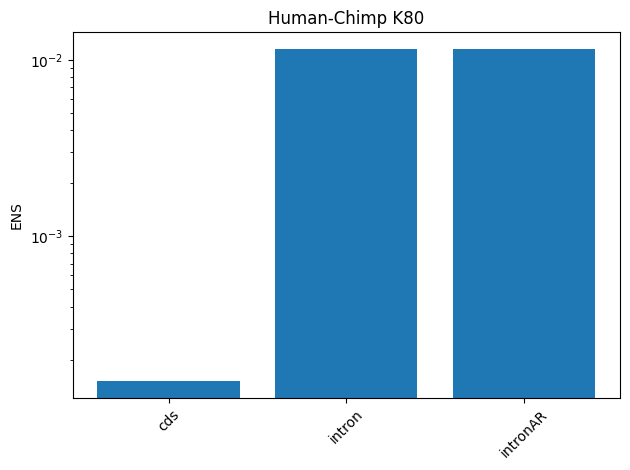

{'cds': np.float64(0.00015084262330534678),
 'intron': np.float64(0.011507411760573601),
 'intronAR': np.float64(0.011493784086830036)}

In [9]:
ENS_human_K80 = {
    "cds": humanENS_cds,
    "intron": humanENS_intron,
    "intronAR": humanENS_intronAR
}

plt.figure()
plt.bar(ENS_human_K80.keys(), ENS_human_K80.values())
plt.yscale("log")  # log scale so small values are visible
plt.ylabel("ENS")
plt.title("Human-Chimp K80")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ENS_human_K80